In [1]:
# Import essential libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import files
uploaded = files.upload()  # Opens a dialog to upload the dataset


Saving HTRU_2.csv to HTRU_2.csv


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Mean_IPP         17898 non-null  float64
 1   StdDev_IPP       17898 non-null  float64
 2   Kurtosis_IPP     17898 non-null  float64
 3   Skewness_IPP     17898 non-null  float64
 4   Mean_DM-SNR      17898 non-null  float64
 5   StdDev_DM-SNR    17898 non-null  float64
 6   Kurtosis_DM-SNR  17898 non-null  float64
 7   Skewness_DM-SNR  17898 non-null  float64
 8   Class            17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB
None
           Mean_IPP    StdDev_IPP  Kurtosis_IPP  Skewness_IPP   Mean_DM-SNR  \
count  17898.000000  17898.000000  17898.000000  17898.000000  17898.000000   
mean     111.079968     46.549532      0.477857      1.770279     12.614400   
std       25.652935      6.843189      1.064040      6.167913     29.472897   
min        5.81

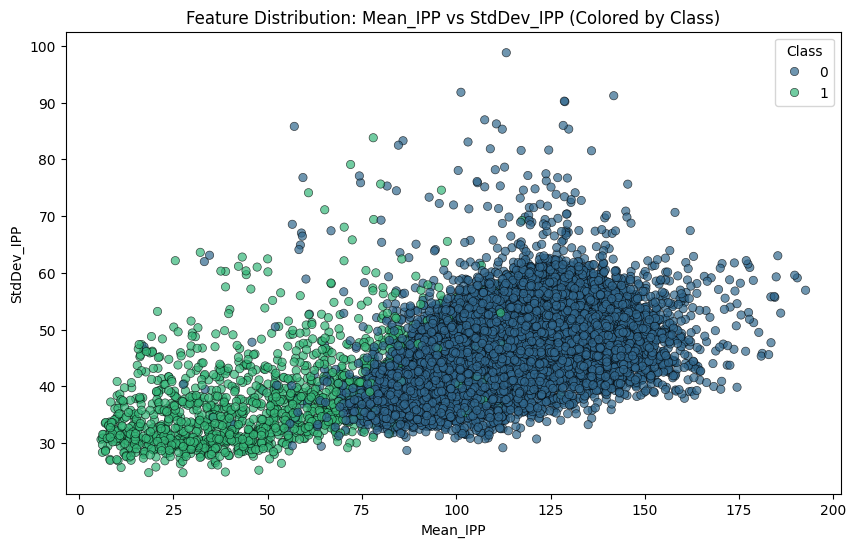

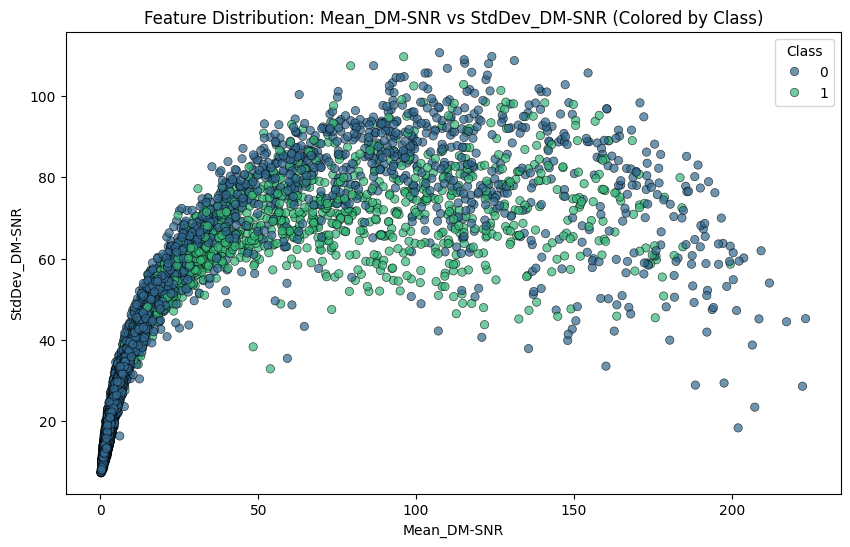

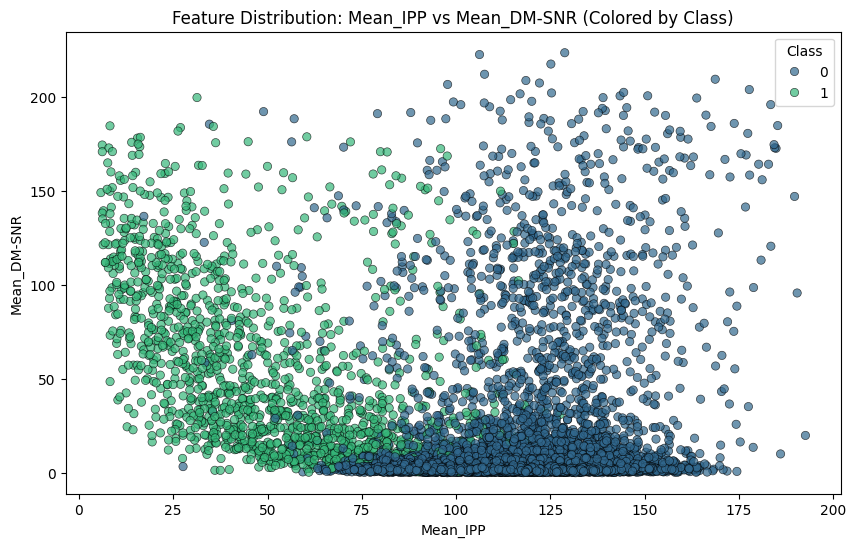

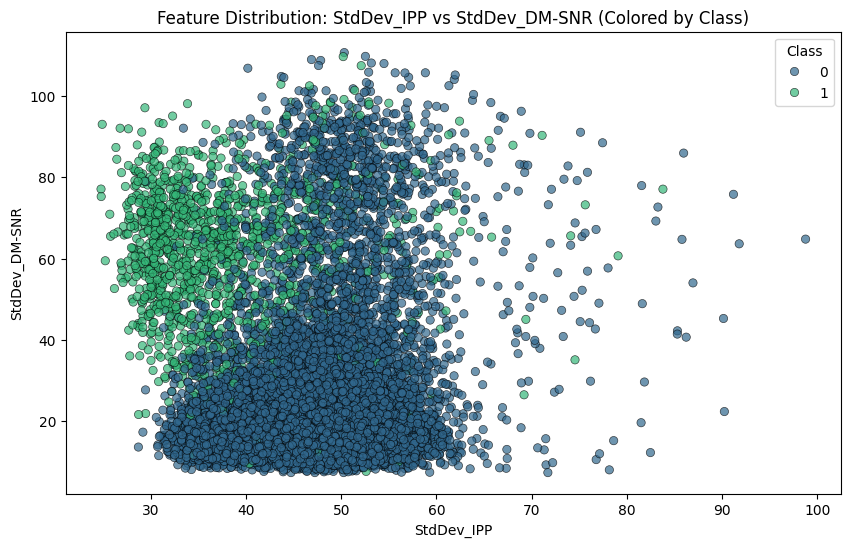

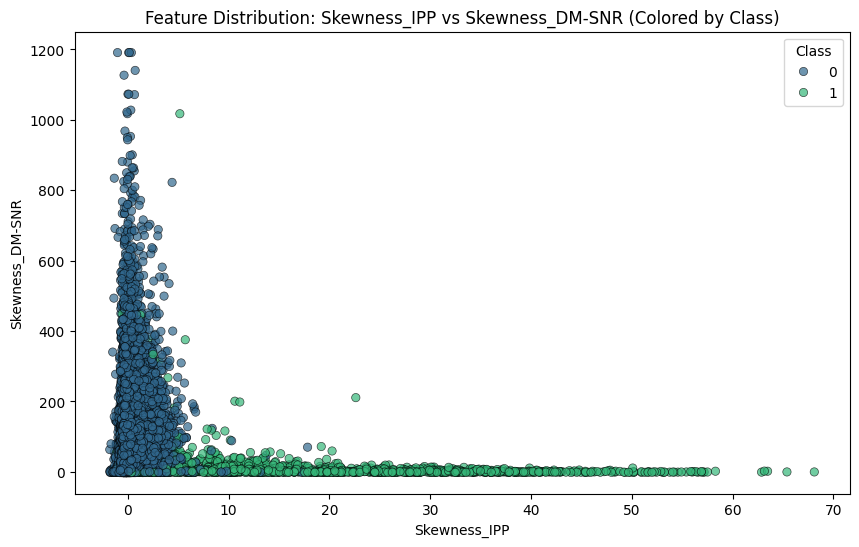

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset and assign column names
dataset = pd.read_csv(next(iter(uploaded.keys())), header=None)
columns = ['Mean_IPP', 'StdDev_IPP', 'Kurtosis_IPP', 'Skewness_IPP',
           'Mean_DM-SNR', 'StdDev_DM-SNR', 'Kurtosis_DM-SNR', 'Skewness_DM-SNR', 'Class']
dataset.columns = columns

# Display basic information
print(dataset.info())
print(dataset.describe())

import seaborn as sns
import matplotlib.pyplot as plt

# Important feature pairs
important_feature_pairs = [
    ('Mean_IPP', 'StdDev_IPP'),
    ('Mean_DM-SNR', 'StdDev_DM-SNR'),
    ('Mean_IPP', 'Mean_DM-SNR'),
    ('StdDev_IPP', 'StdDev_DM-SNR'),
    ('Skewness_IPP', 'Skewness_DM-SNR')
]

# Loop through the important feature pairs and plot them
for f1, f2 in important_feature_pairs:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=dataset, x=f1, y=f2, hue='Class', palette='viridis', edgecolor='black', alpha=0.7)
    plt.title(f'Feature Distribution: {f1} vs {f2} (Colored by Class)')
    plt.xlabel(f1)
    plt.ylabel(f2)
    plt.legend(title='Class', loc='upper right')
    plt.show()


In [4]:
# Separate features and labels
X = dataset.drop('Class', axis=1)
y = dataset['Class']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [5]:
# Random undersampling
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_scaled, y)

# Check class balance
print("Class distribution after undersampling:")
print(pd.Series(y_resampled).value_counts())


Class distribution after undersampling:
Class
0    1639
1    1639
Name: count, dtype: int64


In [6]:
# Split undersampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)


In [24]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Evaluate
y_pred = logreg.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred))
log_class_report=classification_report(y_test, y_pred,output_dict=True)
print(log_class_report)
# Extract F1-score for positive class (real pulsars, label '1')
log_f1 = log_class_report["1"]["f1-score"]
log_precision = log_class_report['1']['precision']
log_recall = log_class_report['1']['recall']
# AUC-ROC
y_prob = logreg.predict_proba(X_test)[:, 1]
log_auc_score = roc_auc_score(y_test, y_prob)
print("Logistic Regression AUC-ROC:", log_auc_score)


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       502
           1       0.96      0.89      0.92       482

    accuracy                           0.93       984
   macro avg       0.93      0.93      0.93       984
weighted avg       0.93      0.93      0.93       984

{'0': {'precision': 0.9014869888475836, 'recall': 0.9661354581673307, 'f1-score': 0.9326923076923077, 'support': 502.0}, '1': {'precision': 0.9618834080717489, 'recall': 0.8900414937759336, 'f1-score': 0.9245689655172413, 'support': 482.0}, 'accuracy': 0.9288617886178862, 'macro avg': {'precision': 0.9316851984596662, 'recall': 0.9280884759716321, 'f1-score': 0.9286306366047745, 'support': 984.0}, 'weighted avg': {'precision': 0.9310714137114531, 'recall': 0.9288617886178862, 'f1-score': 0.9287131908951716, 'support': 984.0}}
Logistic Regression AUC-ROC: 0.9716569407019225


In [23]:
# Support Vector Machine
svm = SVC(probability=True)
svm.fit(X_train, y_train)

# Evaluate
y_pred = svm.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred))
svm_class_report=classification_report(y_test, y_pred,output_dict=True)
print(svm_class_report)
# Extract F1-score for positive class (real pulsars, label '1')
svm_f1 = svm_class_report["1"]["f1-score"]
svm_precision = svm_class_report['1']['precision']
svm_recall = svm_class_report['1']['recall']
# AUC-ROC
y_prob = svm.predict_proba(X_test)[:, 1]
svm_auc_score = roc_auc_score(y_test, y_prob)
print("SVM AUC-ROC:", svm_auc_score)


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       502
           1       0.97      0.86      0.91       482

    accuracy                           0.92       984
   macro avg       0.92      0.92      0.92       984
weighted avg       0.92      0.92      0.92       984

{'0': {'precision': 0.8794964028776978, 'recall': 0.9741035856573705, 'f1-score': 0.9243856332703214, 'support': 502.0}, '1': {'precision': 0.969626168224299, 'recall': 0.8609958506224067, 'f1-score': 0.9120879120879121, 'support': 482.0}, 'accuracy': 0.9186991869918699, 'macro avg': {'precision': 0.9245612855509984, 'recall': 0.9175497181398886, 'f1-score': 0.9182367726791167, 'support': 984.0}, 'weighted avg': {'precision': 0.9236453326511346, 'recall': 0.9186991869918699, 'f1-score': 0.9183617495204014, 'support': 984.0}}
SVM AUC-ROC: 0.9675902200327321


In [42]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Evaluate
y_pred = rf.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))
rf_class_report=classification_report(y_test, y_pred,output_dict=True)
print(rf_class_report)
# Extract F1-score for positive class (real pulsars, label '1')
rf_f1 = rf_class_report["1"]["f1-score"]
rf_precision = rf_class_report['1']['precision']
rf_recall = rf_class_report['1']['recall']

# AUC-ROC
y_prob = rf.predict_proba(X_test)[:, 1]
rf_auc_score = roc_auc_score(y_test, y_prob)
print("Random Forest AUC-ROC:", rf_auc_score)


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       502
           1       0.96      0.90      0.93       482

    accuracy                           0.93       984
   macro avg       0.93      0.93      0.93       984
weighted avg       0.93      0.93      0.93       984

{'0': {'precision': 0.9063670411985019, 'recall': 0.9641434262948207, 'f1-score': 0.9343629343629344, 'support': 502.0}, '1': {'precision': 0.96, 'recall': 0.8962655601659751, 'f1-score': 0.927038626609442, 'support': 482.0}, 'accuracy': 0.9308943089430894, 'macro avg': {'precision': 0.9331835205992509, 'recall': 0.9302044932303979, 'f1-score': 0.9307007804861882, 'support': 984.0}, 'weighted avg': {'precision': 0.9326384702049267, 'recall': 0.9308943089430894, 'f1-score': 0.9307752145080733, 'support': 984.0}}
Random Forest AUC-ROC: 0.967360847068159


In [32]:
from xgboost import XGBClassifier
xgb = XGBClassifier(eval_metric='logloss', scale_pos_weight=1)  # Adjust scale_pos_weight if needed

# Train the model
xgb.fit(X_train, y_train)

# Evaluate
y_pred = xgb.predict(X_test)
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred))
# Extract F1-score for positive class (real pulsars, label '1')
xgb_f1 = svm_class_report["1"]["f1-score"]
xgb_precision = svm_class_report['1']['precision']
xgb_recall = svm_class_report['1']['recall']
# AUC-ROC
y_prob = xgb.predict_proba(X_test)[:, 1]
xgb_auc_score = roc_auc_score(y_test, y_prob)
print("XGBoost AUC-ROC:", xgb_auc)


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       502
           1       0.94      0.90      0.92       482

    accuracy                           0.92       984
   macro avg       0.93      0.92      0.92       984
weighted avg       0.93      0.92      0.92       984

XGBoost AUC-ROC: 0.9661519895521649


In [34]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.utils.class_weight import compute_class_weight

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ensure y_train and y_test are NumPy arrays (1D)
y_train = np.array(y_train).reshape(-1)
y_test = np.array(y_test).reshape(-1)

# Compute class weights to handle imbalance
class_weights = compute_class_weight('balanced', classes=np.array([0, 1]), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

# Define the model
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train_scaled, y_train,
                    epochs=200,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stopping],
                    class_weight=class_weight_dict,
                    verbose=2)

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy:.2f}")

# AUC-ROC Calculation
y_prob = model.predict(X_test_scaled).ravel()  # Probabilities for the positive class
nn_auc_score = roc_auc_score(y_test, y_prob)
print(f"Neural Network AUC-ROC: {nn_auc_score:.2f}")

# Make binary predictions and classification report
y_pred = (y_prob > 0.5).astype(int)
print(classification_report(y_test, y_pred))

# Extract specific metrics from the classification report
report_dict = classification_report(y_test, y_pred, output_dict=True)
nn_f1 = report_dict["1"]["f1-score"]
nn_precision = report_dict["1"]["precision"]
nn_recall = report_dict["1"]["recall"]

print(f"Neural Network Metrics: F1-Score: {nn_f1:.2f}, Precision: {nn_precision:.2f}, Recall: {nn_recall:.2f}")



Epoch 1/200
58/58 - 2s - 35ms/step - accuracy: 0.8916 - loss: 0.3042 - val_accuracy: 0.9259 - val_loss: 0.2134
Epoch 2/200
58/58 - 0s - 5ms/step - accuracy: 0.9204 - loss: 0.2157 - val_accuracy: 0.9216 - val_loss: 0.1963
Epoch 3/200
58/58 - 0s - 5ms/step - accuracy: 0.9275 - loss: 0.1972 - val_accuracy: 0.9390 - val_loss: 0.1846
Epoch 4/200
58/58 - 0s - 5ms/step - accuracy: 0.9330 - loss: 0.1931 - val_accuracy: 0.9346 - val_loss: 0.1817
Epoch 5/200
58/58 - 0s - 4ms/step - accuracy: 0.9373 - loss: 0.1784 - val_accuracy: 0.9346 - val_loss: 0.1753
Epoch 6/200
58/58 - 0s - 6ms/step - accuracy: 0.9422 - loss: 0.1800 - val_accuracy: 0.9412 - val_loss: 0.1728
Epoch 7/200
58/58 - 0s - 5ms/step - accuracy: 0.9379 - loss: 0.1790 - val_accuracy: 0.9368 - val_loss: 0.1836
Epoch 8/200
58/58 - 0s - 5ms/step - accuracy: 0.9422 - loss: 0.1713 - val_accuracy: 0.9390 - val_loss: 0.1703
Epoch 9/200
58/58 - 0s - 4ms/step - accuracy: 0.9417 - loss: 0.1728 - val_accuracy: 0.9259 - val_loss: 0.1881
Epoch 10/

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_grid,  # Use param_grid here
    n_iter=50,  # Number of random combinations to try
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit the random search on training data
random_search.fit(X_train, y_train)

# Output the best parameters found
print("Best parameters found: ", random_search.best_params_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters found:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10}


In [14]:
best_rf = RandomForestClassifier(
    n_estimators=100,
    min_samples_split=2,
    min_samples_leaf=4,
    max_features='sqrt',
    max_depth=10,
    random_state=42
)

# Fit the model on the training data
best_rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, min_samples_leaf=4, random_state=42)

In [39]:
from sklearn.metrics import classification_report, roc_auc_score

# Predict on the test set
y_pred = best_rf.predict(X_test)

# Print classification report for detailed metrics
print(classification_report(y_test, y_pred))

# Extract F1-score for positive class (real pulsars, label '1')
bestrf_f1 = svm_class_report["1"]["f1-score"]
bestrf_precision = svm_class_report['1']['precision']
bestrf_recall = svm_class_report['1']['recall']
# AUC-ROC
y_prob = xgb.predict_proba(X_test)[:, 1]
bestrf_auc_score = roc_auc_score(y_test, y_prob)
print("BestRF Boost AUC-ROC:", bestrf_auc_score)


              precision    recall  f1-score   support

           0       0.90      0.97      0.93       502
           1       0.96      0.89      0.92       482

    accuracy                           0.93       984
   macro avg       0.93      0.93      0.93       984
weighted avg       0.93      0.93      0.93       984

BestRF Boost AUC-ROC: 0.9661519895521649


                 Model   AUC-ROC  F1-Score  Precision    Recall
0  Logistic Regression  0.971657  0.924569   0.961883  0.890041
1                  SVM  0.967590  0.912088   0.969626  0.860996
2        Random Forest  0.967361  0.927039   0.960000  0.896266
3              XGBoost  0.966152  0.912088   0.969626  0.860996
4                  MLP  0.971430  0.924226   0.951648  0.898340
5                 CVRF  0.966152  0.912088   0.969626  0.860996


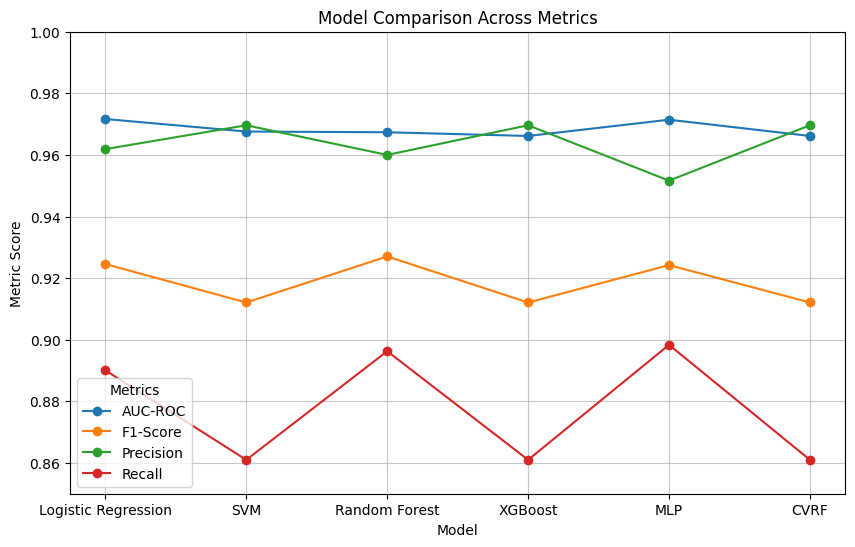

In [40]:
# Compile results
results = {
    "Model": ["Logistic Regression", "SVM", "Random Forest", "XGBoost","MLP","CVRF"],
    "AUC-ROC": [log_auc_score, svm_auc_score, rf_auc_score, xgb_auc_score, nn_auc_score,bestrf_auc_score],
    "F1-Score": [log_f1, svm_f1, rf_f1,xgb_f1,nn_f1,bestrf_f1],
    "Precision": [log_precision, svm_precision, rf_precision,xgb_precision,nn_precision,bestrf_precision],
    "Recall": [log_recall, svm_recall, rf_recall,xgb_recall,nn_recall,bestrf_recall]# Calculate from classification reports
}

results_df = pd.DataFrame(results)
print(results_df)

# Plot line chart
plt.figure(figsize=(10, 6))
for metric in ["AUC-ROC", "F1-Score", "Precision", "Recall"]:
    plt.plot(results_df["Model"], results_df[metric], marker='o', label=metric)

plt.title("Model Comparison Across Metrics")
plt.xlabel("Model")
plt.ylabel("Metric Score")
plt.ylim(0.85, 1)  # Adjust scale to focus on differences
plt.grid(alpha=0.7)
plt.legend(title="Metrics")
plt.show()


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       502
           1       0.96      0.90      0.93       482

    accuracy                           0.93       984
   macro avg       0.93      0.93      0.93       984
weighted avg       0.93      0.93      0.93       984

{'0': {'precision': 0.9063670411985019, 'recall': 0.9641434262948207, 'f1-score': 0.9343629343629344, 'support': 502.0}, '1': {'precision': 0.96, 'recall': 0.8962655601659751, 'f1-score': 0.927038626609442, 'support': 482.0}, 'accuracy': 0.9308943089430894, 'macro avg': {'precision': 0.9331835205992509, 'recall': 0.9302044932303979, 'f1-score': 0.9307007804861882, 'support': 984.0}, 'weighted avg': {'precision': 0.9326384702049267, 'recall': 0.9308943089430894, 'f1-score': 0.9307752145080733, 'support': 984.0}}
[0.16809591 0.03182224 0.34642946 0.15518967 0.08715324 0.10679638
 0.04715778 0.05735532]


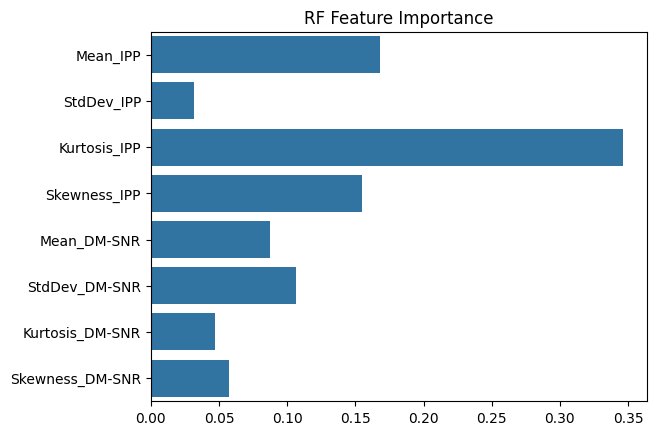

Random Forest AUC-ROC: 0.967360847068159


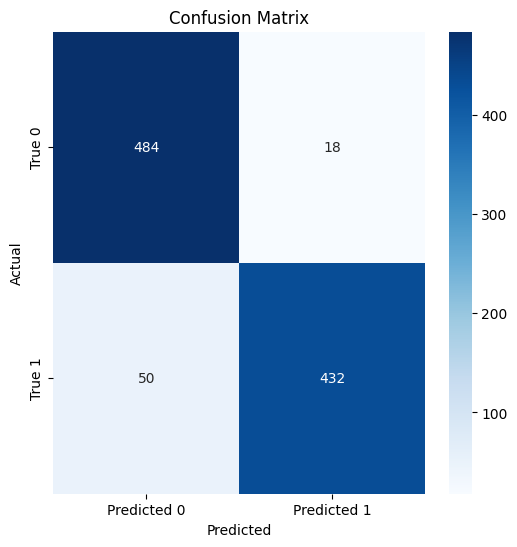

In [55]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Evaluate
y_pred = rf.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))
rf_class_report=classification_report(y_test, y_pred,output_dict=True)
print(rf_class_report)
# Extract F1-score for positive class (real pulsars, label '1')
rf_f1 = rf_class_report["1"]["f1-score"]
rf_precision = rf_class_report['1']['precision']
rf_recall = rf_class_report['1']['recall']
# Feature Importance
importances = rf.feature_importances_
print(importances)
sns.barplot(x=importances, y=columns[:-1])
plt.title("RF Feature Importance")
plt.show()

# AUC-ROC
y_prob = rf.predict_proba(X_test)[:, 1]
rf_auc_score = roc_auc_score(y_test, y_prob)
print("Random Forest AUC-ROC:", rf_auc_score)

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix using seaborn heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

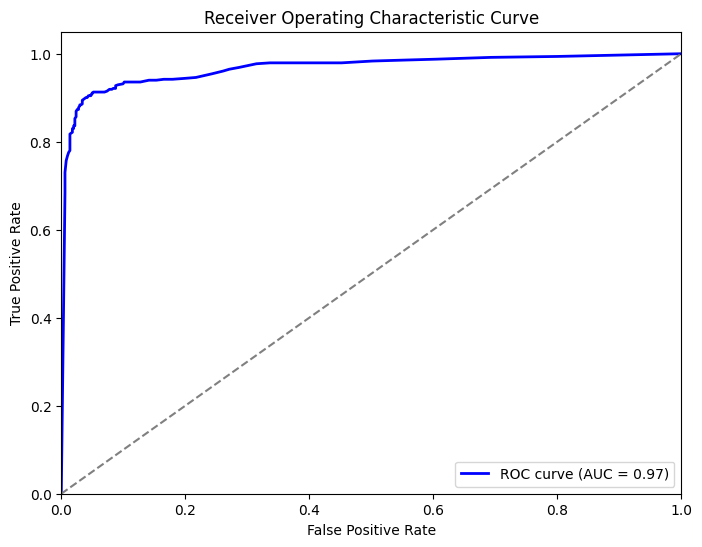

In [57]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


fpr, tpr, thresholds = roc_curve(y_test, y_prob)


roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.show()

